In [2]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [3]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [4]:
dfMain.columns.values


array(['mainid', 'mainworkgroup', 'maindeviceserial', 'maintransferdate',
       'androiddescription', 'geopoint_hh_ind', 'geopoint_hhlongitude',
       'geopoint_hhlatitude', 'geopoint_hhaltitude',
       'geopoint_hhaccuracy', 'regn', 'prov', 'mun', 'zone', 'brgy',
       'purok', 'street', 'hnum', 'hcn', 'int_date', 'start_time',
       'house_type', 'house_type_o', 'nbr', 'roof', 'wall', 'nofw',
       'nnucfam', 'hpregind', 'uniparind', 'disableind', 'phsize',
       'water', 'water_o', 'water_dist', 'toil', 'toil_o', 'tenur',
       'tenur_o', 'imprnt', 'welec', 'elec_company', 'elec_generator',
       'elec_solar', 'elec_battery', 'elec_source_o', 'elec_source_o_lb',
       'radio', 'radio_nwacq', 'tv', 'tv_nwacq', 'vplayer',
       'vplayer_nwacq', 'stereo', 'stereo_nwacq', 'karaoke',
       'karaoke_nwacq', 'ref', 'ref_nwacq', 'efan', 'efan_nwacq', 'iron',
       'iron_nwacq', 'stove', 'stove_nwacq', 'wmach', 'wmach_nwacq',
       'microw', 'microw_nwacq', 'computer', 'compute

In [5]:
dfMain = dfMain.filter(['mainid','brgy','totin']);
# Filters the dataframe to show only the relevant columns for this scoring phase

dfMain

,mainid,brgy,totin
0,1061066,186,176208.0
1,555683,69,204500.0
2,8611889,1,360000.0
3,299398,165,96000.0
4,136921,135,115200.0
5,3842267,43,210000.0
6,899855,201,45000.0
7,235953,190,540000.0
8,1591438,47,132208.0
9,1053432,130,236000.0


In [9]:
#if(x < 42000 and x > 10000):
#income_score = (x-10000) / 32000
for i, row in dfMain.iterrows():
    theScore = 0
    if (row['totin'] >= 42000) :
        dfMain.at[i,'theScore'] = 1.0
    elif (row['totin'] <= 10000) :
        dfMain.at[i,'theScore'] = 0.0
    elif (row['totin'] < 42000 and row['totin'] > 10000) :
        dfMain.at[i,'theScore'] = (row['totin'] - 10000) / 32000


dfMain

,mainid,brgy,totin,theScore
0,1061066,186,176208.0,1.0
1,555683,69,204500.0,1.0
2,8611889,1,360000.0,1.0
3,299398,165,96000.0,1.0
4,136921,135,115200.0,1.0
5,3842267,43,210000.0,1.0
6,899855,201,45000.0,1.0
7,235953,190,540000.0,1.0
8,1591438,47,132208.0,1.0
9,1053432,130,236000.0,1.0


In [10]:
arrayBrgyScores = dfMain.groupby('brgy')['theScore'].mean()

arrayBrgyScores

brgy
1      1.000000
2      0.995097
3      1.000000
4      0.994135
5      0.979268
6      0.997130
7      0.997384
8      0.982233
9      1.000000
10     0.992708
11     0.998092
12     0.990292
13     0.982075
14     0.993958
15     1.000000
16     0.987973
17     1.000000
18     0.995469
19     0.993507
20     0.990721
21     0.983043
22     1.000000
23     0.994877
24     0.999344
25     1.000000
26     0.989190
27     0.987558
28     0.994630
29     1.000000
30     0.962430
         ...   
172    0.981867
173    0.993750
174    0.992043
175    0.987472
176    1.000000
177    0.938342
178    0.993489
179    0.974643
180    0.996692
181    0.995084
182    0.994088
183    0.994880
184    0.995790
185    0.997480
186    0.980704
187    0.995439
188    0.986949
189    0.955940
190    0.981764
191    0.995934
192    0.991977
193    0.992378
194    0.995418
195    0.990401
196    0.987000
197    0.986156
198    0.977521
199    0.991610
200    0.996789
201    0.949811
Name: theScore, Len

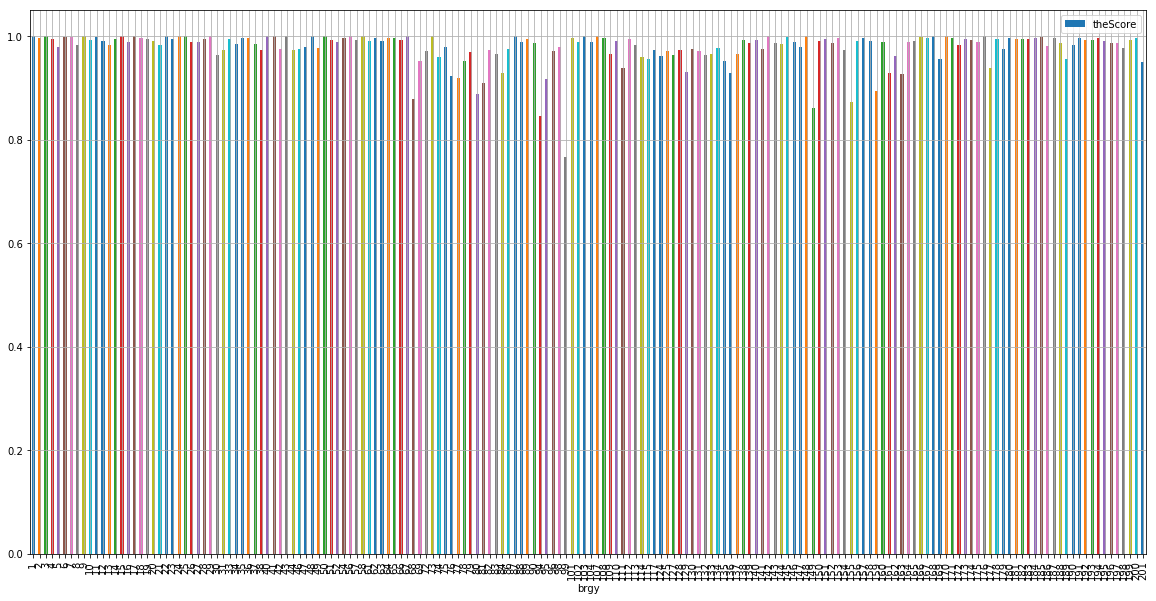

In [11]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()